In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("font", family="serif")
plt.rc("text", usetex=True)

with open('internight_gaps_i.pickle', 'rb') as f:
    ing2 = pickle.load(f)
    
data = np.load('baseline2018a_Median_Inter-Night_Gap_WFD_i_band_HEAL.npz', allow_pickle=True)
ing1 = data['metricValues']
ing1 = ing1[ing1 > 0.5]

print("Median inter-night gap: ", np.median(ing1))

Median inter-night gap:  11.008518518516212


In [22]:
print(data.files)
print(data['header'])

['header', 'metricValues', 'mask', 'fill', 'slicer_init', 'slicerName', 'slicePoints', 'slicerNSlice', 'slicerShape']
{'metricName': 'Median Inter-Night Gap', 'constraint': '(proposalId = 3) and (filter = "i")', 'metadata': 'WFD i band', 'simDataName': 'baseline2018a', 'dateRan': '2018-06-24', 'displayDict': {'group': 'InterNight', 'subgroup': 'Night gaps', 'order': 4, 'caption': 'Median gap between nights with observations, WFD i band.'}, 'plotDict': {'color': 'r'}, '__version__': '2.8.0.sims-40-g2ae7a75c', '__repo_version__': '2.8.0.sims-40-g2ae7a75c', '__fingerprint__': '2ae7a75c494a0646a095ce19de1dd58efe5dea3a', '__dependency_versions__': {}}


In [23]:
print(len(ing1), len(ing2))
print(max(ing2))

21495 17302714
600.2960999999996


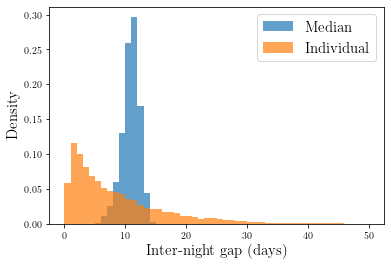

In [21]:


plt.figure()
plt.hist(ing1, bins=50, range=(0, 50), alpha=0.7, density=True, label="Median")
plt.hist(ing2, bins=50, range=(0, 50), alpha=0.7, density=True, label="Individual")
plt.xlabel("Inter-night gap (days)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend(fontsize=15)
plt.savefig("inter-night_gap.png", dpi=100, facecolor='white')
plt.show()

In [21]:
print("Median inter-night gap: ", np.median(ing2))

Median inter-night gap:  6.9835000000020955


(array([2.7657e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 7.0000e+00,
        6.0000e+00, 2.3000e+01, 3.3000e+01, 1.2600e+02, 1.7500e+02,
        2.8000e+02, 3.0400e+02, 6.3200e+02, 8.1400e+02, 1.0700e+03,
        2.2320e+03, 1.9530e+03, 4.0230e+03, 2.2450e+03, 3.6710e+03,
        1.5320e+03, 1.6020e+03, 4.4200e+02, 2.8400e+02, 4.0000e+01]),
 array([5.58125834e-315, 4.97523920e-001, 9.95047840e-001, 1.49257176e+000,
        1.99009568e+000, 2.48761960e+000, 2.98514352e+000, 3.48266744e+000,
        3.98019136e+000, 4.47771528e+000, 4.97523920e+000, 5.47276312e+000,
        5.97028704e+000, 6.46781096e+000, 6.96533488e+000, 7.46285880e+000,
        7.96038272e+000, 8.45790664e+000, 8.95543056e+000, 9.45295448e+000,
        9.95047840e+000, 1.04480023e+001, 1.09455262e+001, 1.14430502e+001,
        1.19405741e+001, 1.24380980e+001, 1.29356219e+001, 1.34331458e+001,
        1.39306698e+001, 1.44281937e+001, 1.49257176e+001]

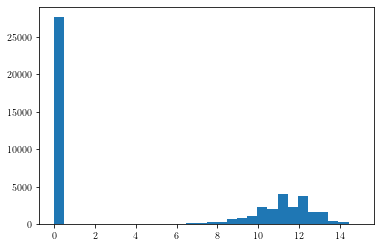

In [20]:
data = np.load('baseline2018a_Median_Inter-Night_Gap_WFD_i_band_HEAL.npz', allow_pickle=True)

plt.figure(2)
plt.hist(data['metricValues'], bins=30)

In [19]:


def read_sqlite(dbfile):
    import sqlite3
    from pandas import read_sql_query, read_sql_table

    with sqlite3.connect(dbfile) as dbcon:
        tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])
        out = {tbl : read_sql_query(f"SELECT * from {tbl}", dbcon) for tbl in tables}

    return out

table = read_sqlite('baseline_v2.0_10yrs.db')

{'observations':          observationId     fieldRA   fieldDec  observationStartMJD  \
0                    0  310.024480 -60.812928         60218.001806   
1                    1  310.601871 -63.561425         60218.002254   
2                    2  311.292611 -66.317774         60218.002703   
3                    3  312.140731 -69.082666         60218.003152   
4                    4  304.170163 -73.375442         60218.003624   
...                ...         ...        ...                  ...   
2086975        2086975  338.528926 -55.399555         63870.104267   
2086976        2086976  347.380828 -54.922128         63870.104758   
2086977        2086977  350.974688 -52.986827         63870.105219   
2086978        2086978  356.062503 -53.778759         63870.105677   
2086979        2086979  352.585400 -55.879554         63870.106138   

         flush_by_mjd  visitExposureTime filter   rotSkyPos  numExposures  \
0        60218.023576               30.0      y   62.750775      